# First

In [12]:
# importation des bibliothèques 

import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno  
import re

In [14]:
#on lit le fichier excel

données_fifa = pd.read_excel("fifa_data.xlsx")

# Nettoyage et traitement de DATA

In [15]:
données_fifa.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Unnamed: 89
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,NaN
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,NaN
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,NaN
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,NaN
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K,NaN


# Fonctions

In [16]:
""""____________________________fonction permettant lea visualisation des données manquantes_________________________________"""



def profil_données(nom_data):  
    
    msno.matrix(nom_data)

    # Récupérer les noms de colonnes
    noms_colonnes = nom_data.columns

    # on Personnalise l'affichage en ajoutant les noms de colonnes à l'en-tête
    plt.title("Matrice de valeurs manquantes avec noms de colonnes")
    plt.xlabel("Colonnes")
    plt.ylabel("Lignes")
    plt.xticks(ticks=range(len(noms_colonnes)), labels=noms_colonnes, rotation=90)

    # on Affiche le graphique
    return plt.show()

""""____________________________fonction permettant de vérifier la normalisation des données_________________________________"""


def normalisation(colonne, regex):
    # on repère les données incorrectes dans la colonne Crossing grace à une regulation d'expression
    i=0
    for element in données[colonne]:
        if re.fullmatch(regex, str(element)): 
            i+=1
        else:
            print(element)

    if i == 0 :
        print("il y a {} datas correctes parmis {}".format(i, len(données[colonne])))
    else:
        print("toutes les datas sont sous le bon format")
    


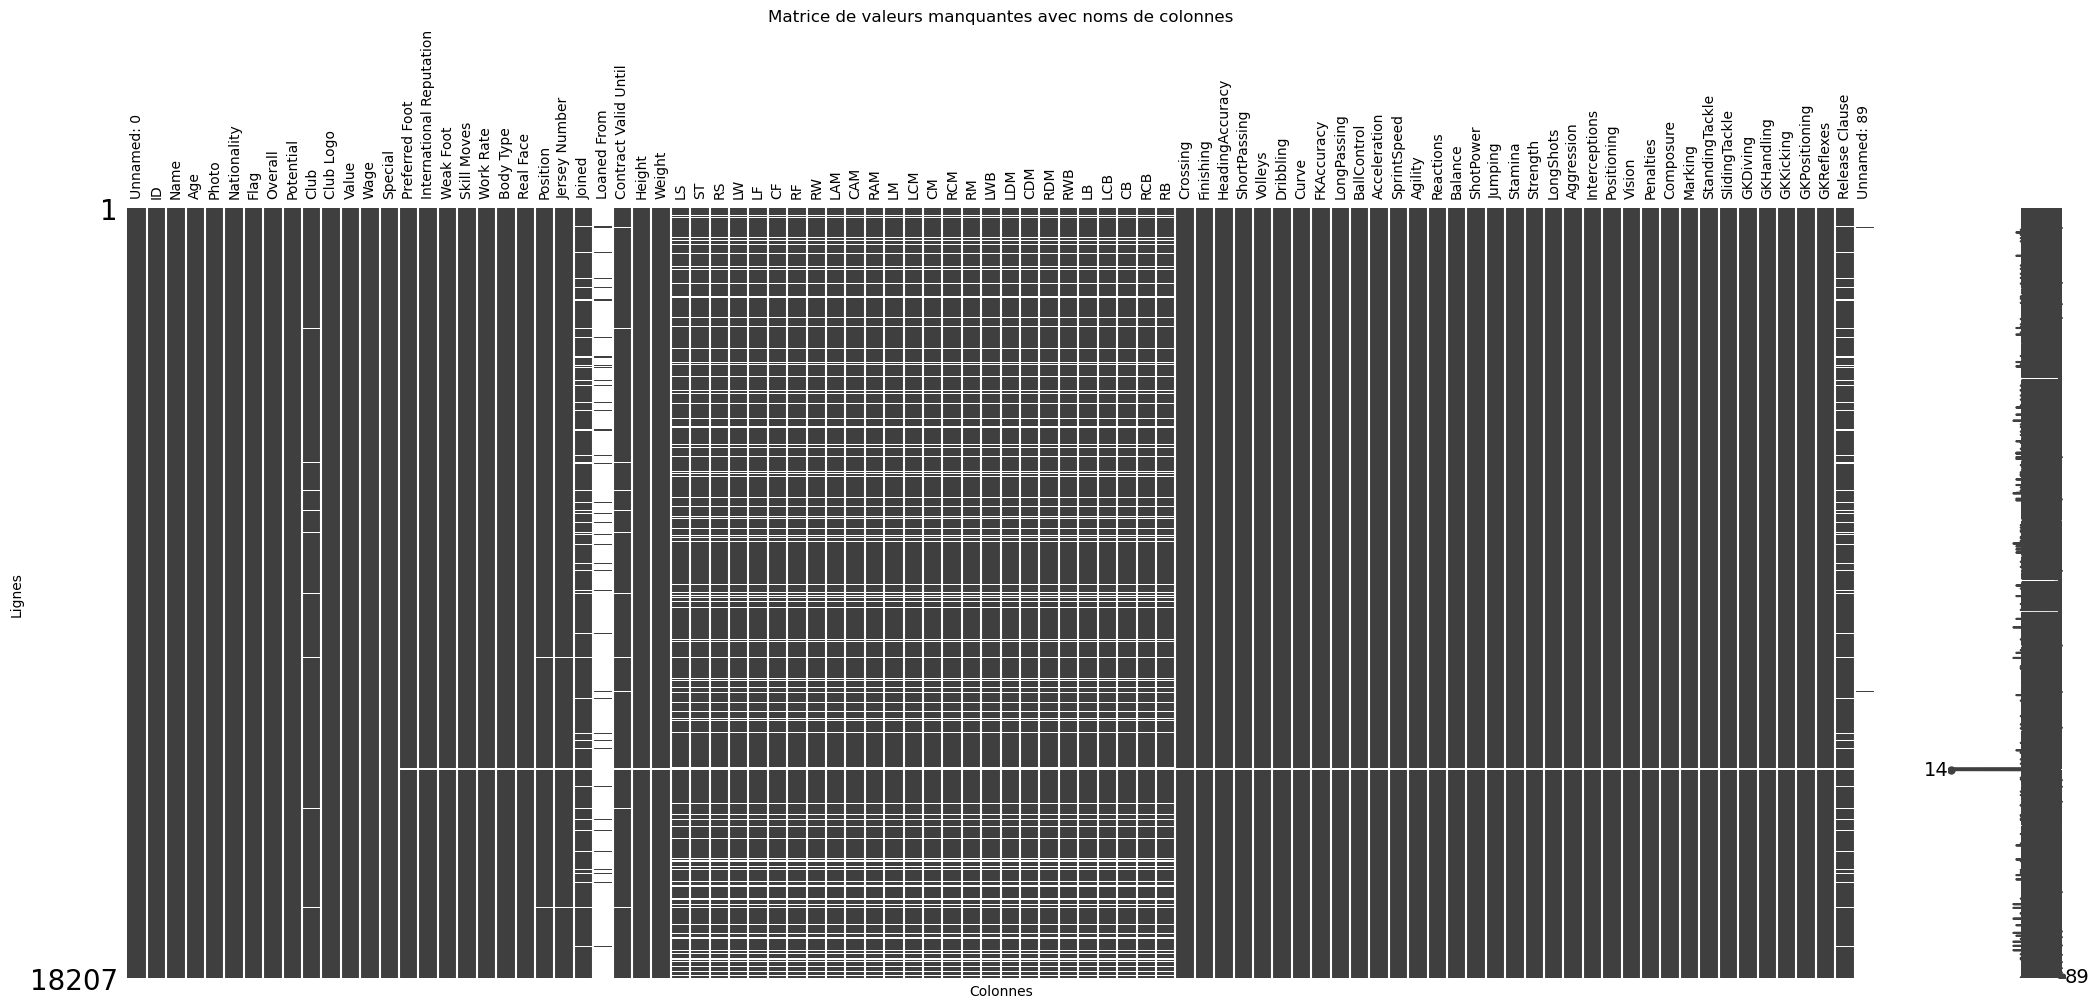

In [17]:
profil_données(données_fifa)

In [18]:
# on localise les indices des colonnes entre lesquelles se situent nos colonnes à supprimer

index_colonne_debut = données_fifa.columns.get_loc("LS")
index_colonne_fin = données_fifa.columns.get_loc("Crossing")

# on supprime les colonnes situées entre les deux index de colonnes spécifiées

données_fifa = données_fifa.drop(données_fifa.columns[index_colonne_debut:index_colonne_fin], axis=1)

# suppression de certaines colonnes spécifiques

colonnes_a_supprimer = ["Unnamed: 89","Joined","Contract Valid Until", "Release Clause", "Photo", "Flag", "Club Logo","Real Face", "Loaned From", "Special","Unnamed: 0","Jersey Number", "Value","Club","Wage"] 
données_fifa = données_fifa.drop(colonnes_a_supprimer, axis=1)


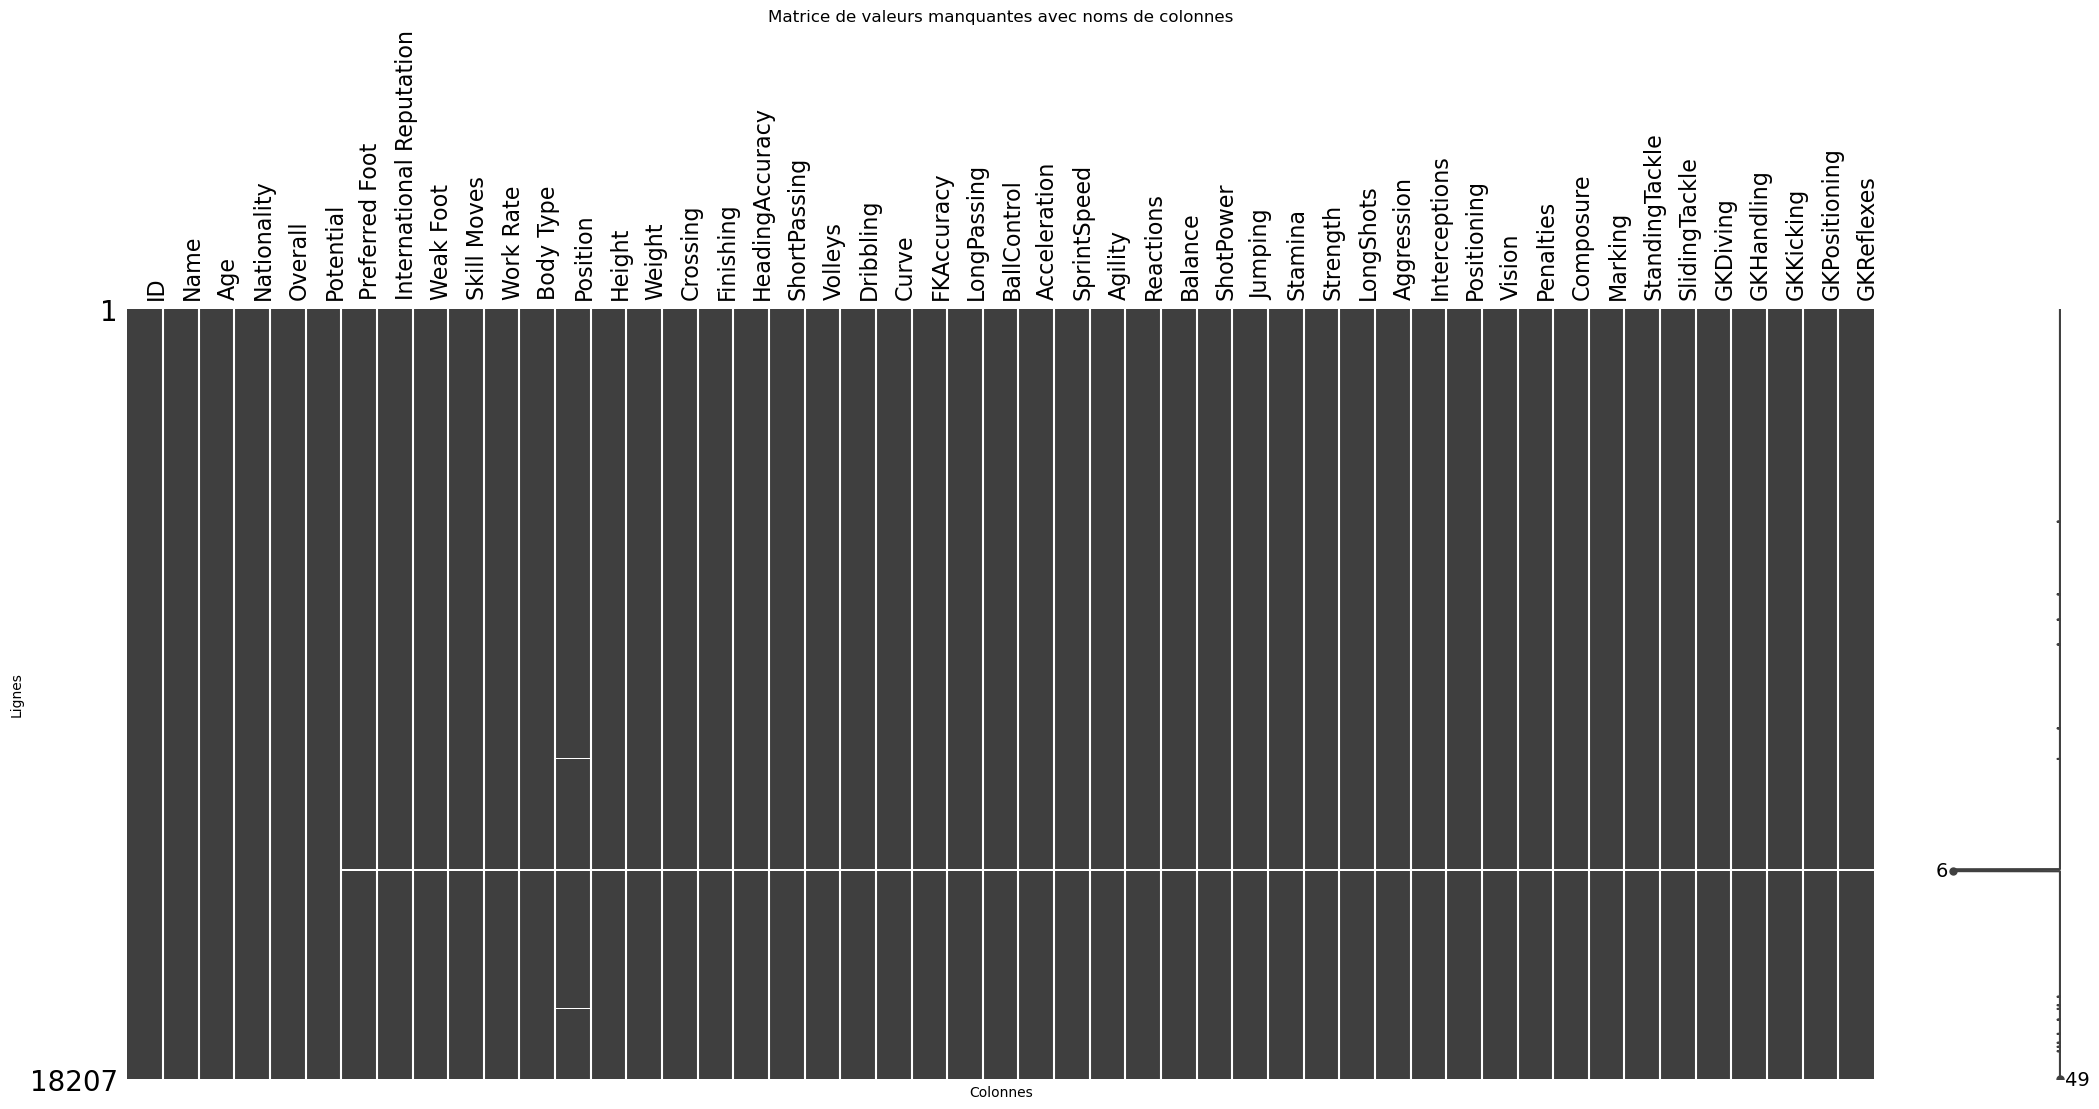

In [19]:
profil_données(données_fifa)

In [20]:
# recherche des doublons 
données_fifa.duplicated().sum()

0

In [21]:
# on supprime les lignes vides 

données=données_fifa.dropna(subset=['Preferred Foot',"Position"]) 

In [22]:
# suppression des lignes dont les postes ne sont pas mentionnés
données = données.drop(données[données["Position"] == "No"].index)

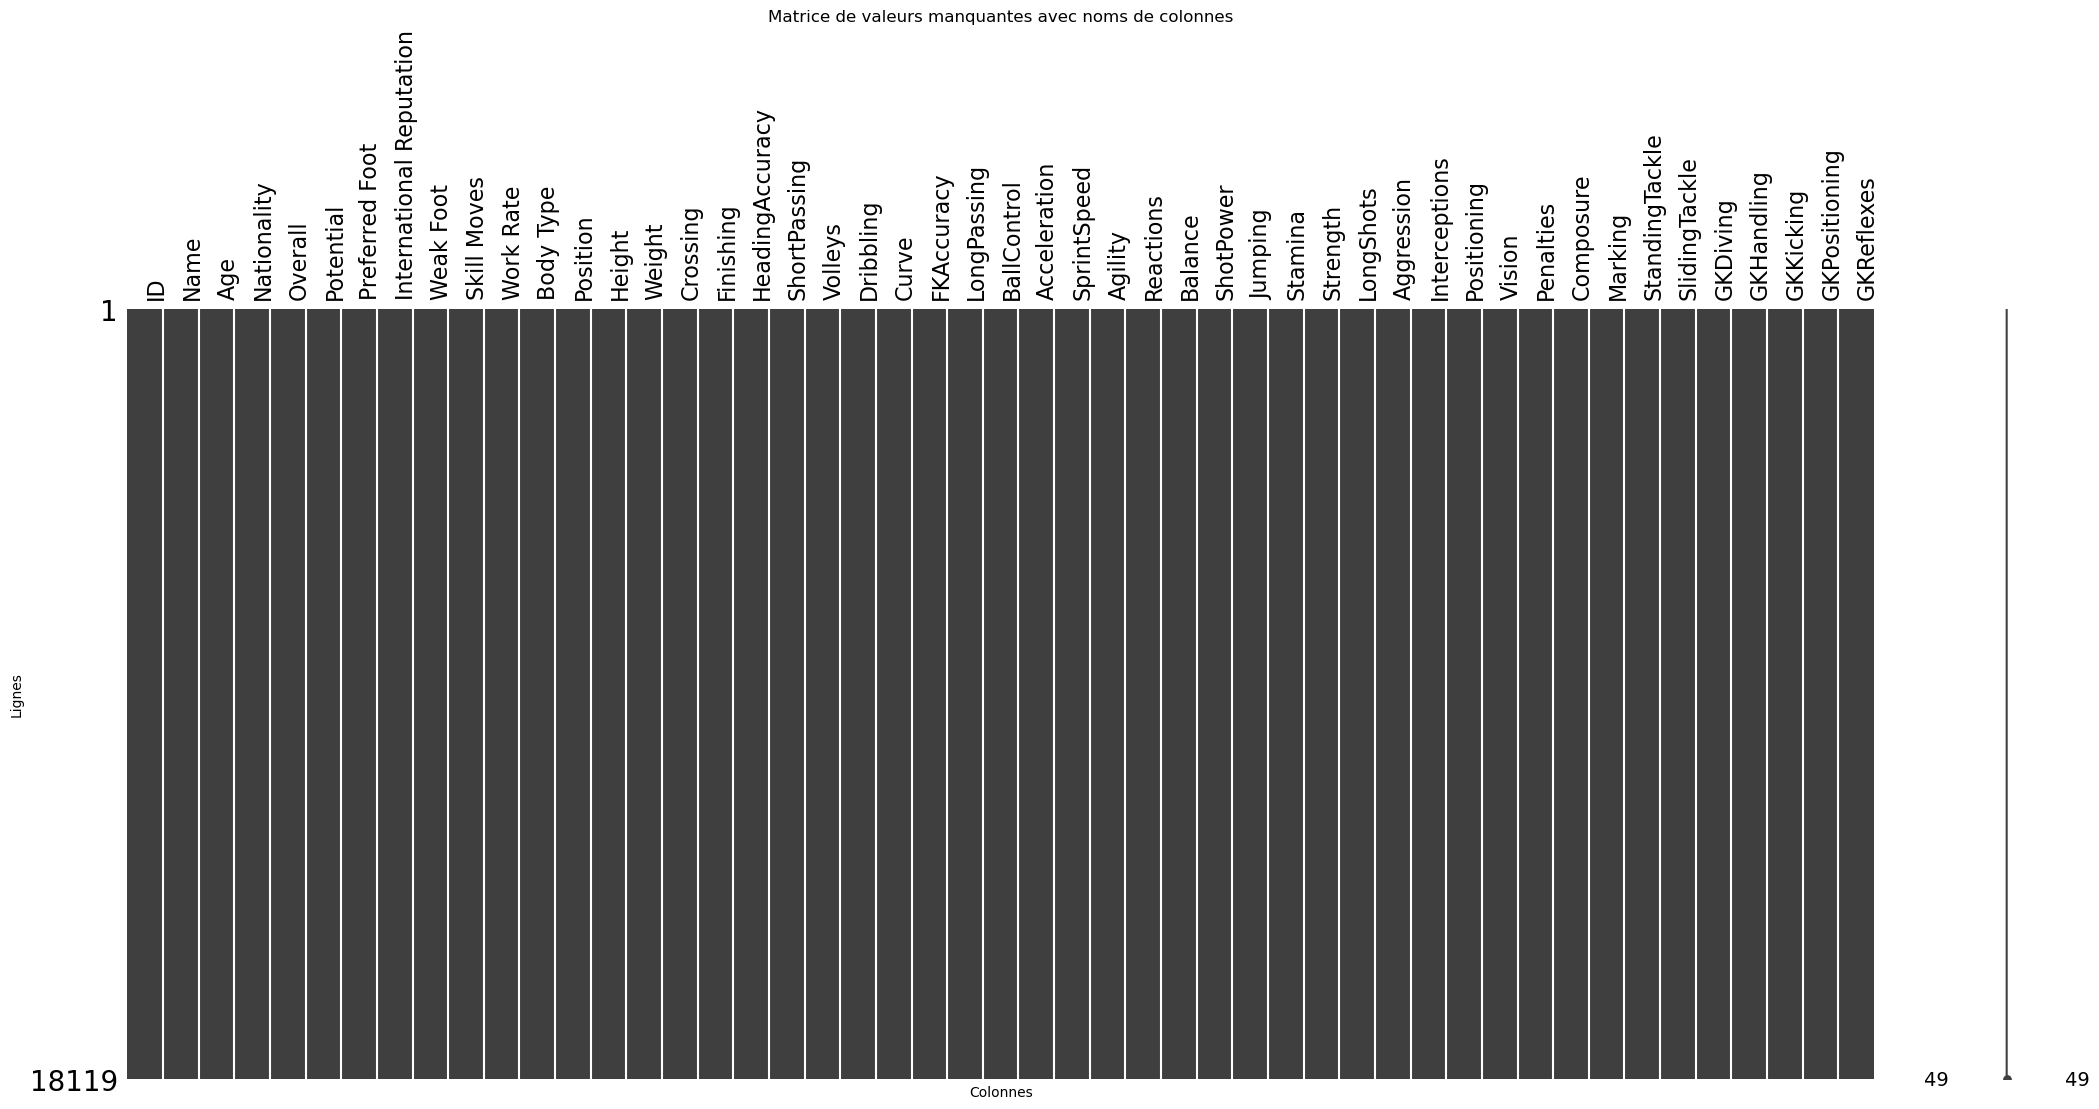

In [23]:
profil_données(données)

<BarContainer object of 27 artists>

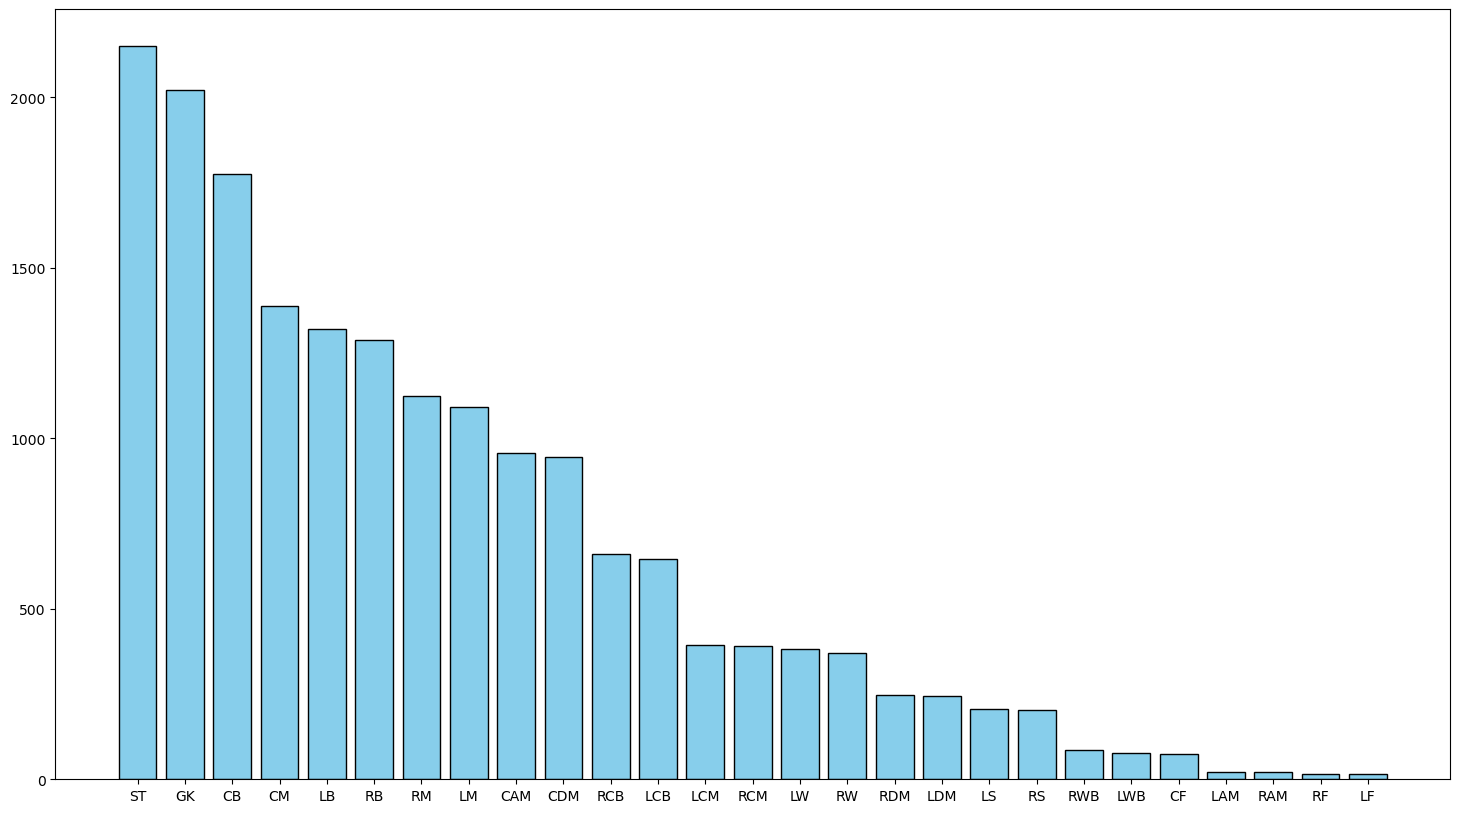

In [24]:
# on souhaite voir la distribution des données dans la table 
occurrences = données['Position'].value_counts()

# on souhaites Trier les occurrences par ordre décroissant
occurrences = occurrences.sort_values(ascending=False)

plt.figure(figsize=(18, 10))
plt.bar(occurrences.index, occurrences, color='skyblue', edgecolor='black')


In [25]:
données.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18119 entries, 0 to 18206
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18119 non-null  int64  
 1   Name                      18119 non-null  object 
 2   Age                       18119 non-null  int64  
 3   Nationality               18119 non-null  object 
 4   Overall                   18119 non-null  int64  
 5   Potential                 18119 non-null  int64  
 6   Preferred Foot            18119 non-null  object 
 7   International Reputation  18119 non-null  object 
 8   Weak Foot                 18119 non-null  float64
 9   Skill Moves               18119 non-null  float64
 10  Work Rate                 18119 non-null  object 
 11  Body Type                 18119 non-null  object 
 12  Position                  18119 non-null  object 
 13  Height                    18119 non-null  object 
 14  Weight     

In [26]:
# on substitue les postes du milieu de terrain
données.loc[: ,"Position"] = données["Position"].replace({"CAM":"CM", "CDM":"CM", "RCM":"RM", "RAM":"RM","LCM":"LM", "LAM":"LM"})
# on substitue les postes de la defense 
données.loc[: ,"Position"] = données["Position"].replace({"RCB": "RB", "RWB": "RB","LCB": "LB", "LWB": "LB"})
# on substitue les postes de l'attaque 
données.loc[: ,"Position"] = données["Position"].replace({"CF": "ST","RS": "ST", "LS": "ST","LF": "ST", "RF": "ST"})

In [27]:
# on affiche les différents postes avec leurs occurences
données["Position"].value_counts()

Position
CM     3293
ST     2664
LB     2045
RB     2036
GK     2022
CB     1775
RM     1534
LM     1508
LW      381
RW      370
RDM     248
LDM     243
Name: count, dtype: int64

# Création de la colonne Groupe de poste

In [28]:
# je crée une colonne pour les groupes de postes
données['Groupes_postes'] = ""

# on la remplis de façon conditionnelle
données.loc[données["Position"]== "GK" , "Groupes_postes"] = "Gardien"
données.loc[données["Position"]== "ST" , "Groupes_postes"] = "Attaquant"
données.loc[données["Position"].isin(["CB","RB","LB"]), "Groupes_postes"] = "Defenseur"
données.loc[données["Position"].isin(["CM","RM","LM"]), "Groupes_postes"] = "Milieu_de_terrain"
données.loc[données["Position"].isin(["RDM","LDM"]), "Groupes_postes"] = "Milieu_défensif"
données.loc[données["Position"].isin(["RW","LW"]), "Groupes_postes"] = "Ailier"

In [29]:
données = données.reset_index(drop=True)

In [30]:
données.tail()

,ID,Name,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Groupes_postes
18114,238813,J. Lundstram,19,England,47,65,Right,1,2.0,2.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,Milieu_de_terrain
18115,243165,N. Christoffersson,19,Sweden,47,63,Right,1,2.0,2.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,Attaquant
18116,241638,B. Worman,16,England,47,67,Right,1,3.0,2.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,Attaquant
18117,246268,D. Walker-Rice,17,England,47,66,Right,1,3.0,2.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,Ailier
18118,246269,G. Nugent,16,England,46,66,Right,1,3.0,2.0,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,Milieu_de_terrain


# Transformation de la colonne Crossing

In [31]:
normalisation(colonne = "Crossing", regex="([0-9]{2}|[0-9]{1})")

toutes les datas sont sous le bon format


In [62]:
# on change le type de la colonne
données['Crossing'] = données['Crossing'].astype(int)

# Transformation de la colonne Weight

In [63]:
normalisation(colonne = "Weight", regex="([0-9]{3}lbs)")

toutes les datas sont sous le bon format


In [64]:
# on supprime l'unité de mesure

données["Weight"] = données["Weight"].astype(str)
données["Weight"]=données["Weight"].str.replace("lbs","")
données["Weight"] = données["Weight"].astype(float)

# on passe à la conversion en kg 
données["Weight"]= données["Weight"] * 0.454

# Colonne Height

In [65]:
normalisation(colonne = "Height", regex="([0-9]{1}'[0-9]{1}|[0-9]{1}'[0-9]{2})")

toutes les datas sont sous le bon format


In [66]:
# on supprime l'unité de mesure

données["Height"] = données["Height"].astype(str)
données["Height"]=données["Height"].str.replace("'",".")
données["Height"] = données["Height"].astype(float)

# on passe à la conversion en Mètre 
données["Height"]= données["Height"] * 0.3048

In [67]:
données['Imc'] = données['Weight'] / données['Height'] 

# Colonne international reputation

In [68]:
# on repère les données incorrectes dans la colonne international reputation grace à une regulation d'expression

i=0
for element in données["International Reputation"]:
    if re.fullmatch("([0-9]{1})", str(element)): 
        i+=1
    else: 
        print(element)
if i != len(données["International Reputation"]) :
    print("il y a {} datas correctes parmis {}".format(i, len(données["Wage"])))
else:
    print("toutes les datas sont sous un meme format")

toutes les datas sont sous un meme format


In [69]:
# on change le type de la colonne
données['International Reputation'] = données['International Reputation'].astype(int)

# Colonne Body type

In [70]:
# # on repère les données incorrectes dans la colonne Body Type grace à une regulation d'expression

i=0
for element in données["Body Type"]:
    if element in ["Normal","Lean","Stocky"] : 
        i+=1
    else: 
        print(element)
if i != len(données["Body Type"]) :
    print("il y a {} datas correctes parmis {}".format(i, len(données["Body Type"])))
else:
    print("toutes les datas sont sous un meme format")

Messi
C. Ronaldo
Neymar
Courtois
PLAYER_BODY_TYPE_25
Shaqiri
Akinfenwa
il y a 18112 datas correctes parmis 18119


In [71]:
# on corrige les irrégularités
for element in données["Body Type"]:
    if element in ["Normal","Lean","Stocky"] : 
        pass
    else:
        données["Body Type"] = "Normal"

# Exportation du dataset clean

In [72]:
données.to_excel("data_fifa_clean.xlsx", index=False)